# Observed Trend
1. Rural Fares vary a lot and have least number of rides
2. Urban have the most number of rides with lower fares on average
3. There seems to be a correlation between Total number of rides and driver count... =)

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ride_df = pd.read_csv('ride_data.csv')
city_df = pd.read_csv('city_data.csv')
merged_df = pd.merge(ride_df, city_df, on="city")
merged_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


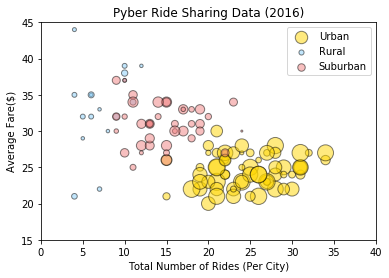

In [10]:
df_urban = merged_df.loc[merged_df["type"] == "Urban",:]
fare_urban = df_urban.groupby('city')['fare'].mean().round(0)
ride_urban = df_urban.groupby('city')['ride_id'].count()
driver_urban = df_urban.groupby('city')['driver_count'].mean()
colors = 'gold'
plt.scatter(ride_urban, fare_urban,s=driver_urban*4, alpha=0.5,edgecolors="black", c=colors,label='Urban')
plt.ylim(15, 45)
plt.xlim(0, 40)
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.legend()

df_rural = merged_df.loc[merged_df["type"] == "Rural",:]
fare_rural = df_rural.groupby('city')['fare'].mean().round(0)
ride_rural = df_rural.groupby('city')['ride_id'].count()
driver_rural = df_rural.groupby('city')['driver_count'].mean()

colors = 'lightskyblue'
plt.scatter(ride_rural, fare_rural,s=driver_rural*4, alpha=0.5,edgecolors="black", c=colors,label='Rural')
plt.ylim(15, 45)
plt.xlim(0, 40)
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.legend()

df_suburban = merged_df.loc[merged_df["type"] == "Suburban",:]
fare_suburban = df_suburban.groupby('city')['fare'].mean().round(0)
ride_suburban = df_suburban.groupby('city')['ride_id'].count()
driver_suburban = df_suburban.groupby('city')['driver_count'].mean()

colors = 'lightcoral'
plt.scatter(ride_suburban, fare_suburban,s=driver_suburban*4, alpha=0.5,edgecolors="black", c=colors,label='Suburban')
plt.ylim(15, 45)
plt.xlim(0, 40)
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.legend()

plt.show()


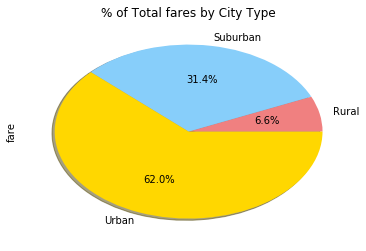

In [11]:
fare_type = merged_df.groupby('type')
count_fare = fare_type['fare'].sum()
colors = 'lightcoral', 'lightskyblue','gold'
fare_chart = count_fare.plot(kind='pie',colors=colors,autopct="%1.1f%%", shadow=True)
fare_chart.set_title("% of Total fares by City Type")
plt.show()

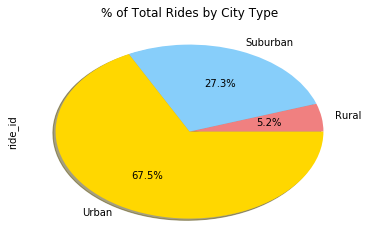

In [12]:
ride_type = merged_df.groupby('type')
count_ride = ride_type['ride_id'].count()
colors = 'lightcoral', 'lightskyblue','gold'
ride_chart = count_ride.plot(kind='pie',colors=colors,autopct="%1.1f%%", shadow=True)
ride_chart.set_title("% of Total Rides by City Type")
plt.show()

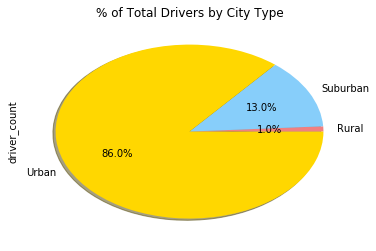

In [13]:
driver_type = merged_df.groupby('type')
colors = 'lightcoral', 'lightskyblue','gold'
count_driver = driver_type['driver_count'].sum()
driver_chart = count_driver.plot(kind='pie',colors=colors,autopct="%1.1f%%", shadow=True)
driver_chart.set_title("% of Total Drivers by City Type")
plt.show()